In [67]:
import pandas as pd
import numpy as np
%matplotlib inline


# Построить график, где по оси x - смертность (смертей на случай).
# По оси y - тестов на обнаруженный кейс.
# Bubble - сколько кейсов и сколько население страны.
#
# Только репрезентативные данные -
# или тестов > 50.000, или кейсов > 10000. 

# подписать оси

In [9]:
def add_mortality_rate(row):
    deaths = row["Deaths"]
    cases = row["Cases"]
    mortality_rate = 0
    if cases:
        mortality_rate = deaths / cases
    return mortality_rate

In [10]:
def tests_for_case(row):
    cases = row["Cases"]
    tests = row["Tests"]
    tests_for_case = 0
    if cases:
        tests_for_case = tests / cases
    return tests_for_case

In [62]:
df = pd.read_csv('corona_data.csv')
df = df.query("Tests > 50000 or Cases > 10000")
df['Mortality Rate'] = df.apply(lambda row: add_mortality_rate(row), axis=1)
df['Tests for Case'] = df.apply(lambda row: tests_for_case(row), axis=1)

In [63]:
df

,Country,Cases,Deaths,Tests,PopM,Mortality Rate,Tests for Case
0,USA,311637.0,8454.0,1656897.0,330.9822,0.027128,5.316753
1,Spain,130759.0,12418.0,355000.0,46.7536,0.094969,2.714918
2,Italy,124632.0,15362.0,657224.0,60.4622,0.123259,5.273317
3,Germany,96108.0,1446.0,918460.0,83.7858,0.015046,9.556541
4,France,89953.0,7560.0,224254.0,65.2660,0.084044,2.493013
5,China,81669.0,3329.0,NaN,NaN,0.040762,NaN
6,Iran,58226.0,3603.0,186000.0,84.0108,0.061880,3.194449
7,UK,41903.0,4313.0,183190.0,67.8984,0.102928,4.371763
8,Turkey,23934.0,501.0,161380.0,84.3596,0.020933,6.742709
9,Switzerland,21100.0,666.0,158000.0,8.6547,0.031564,7.488152


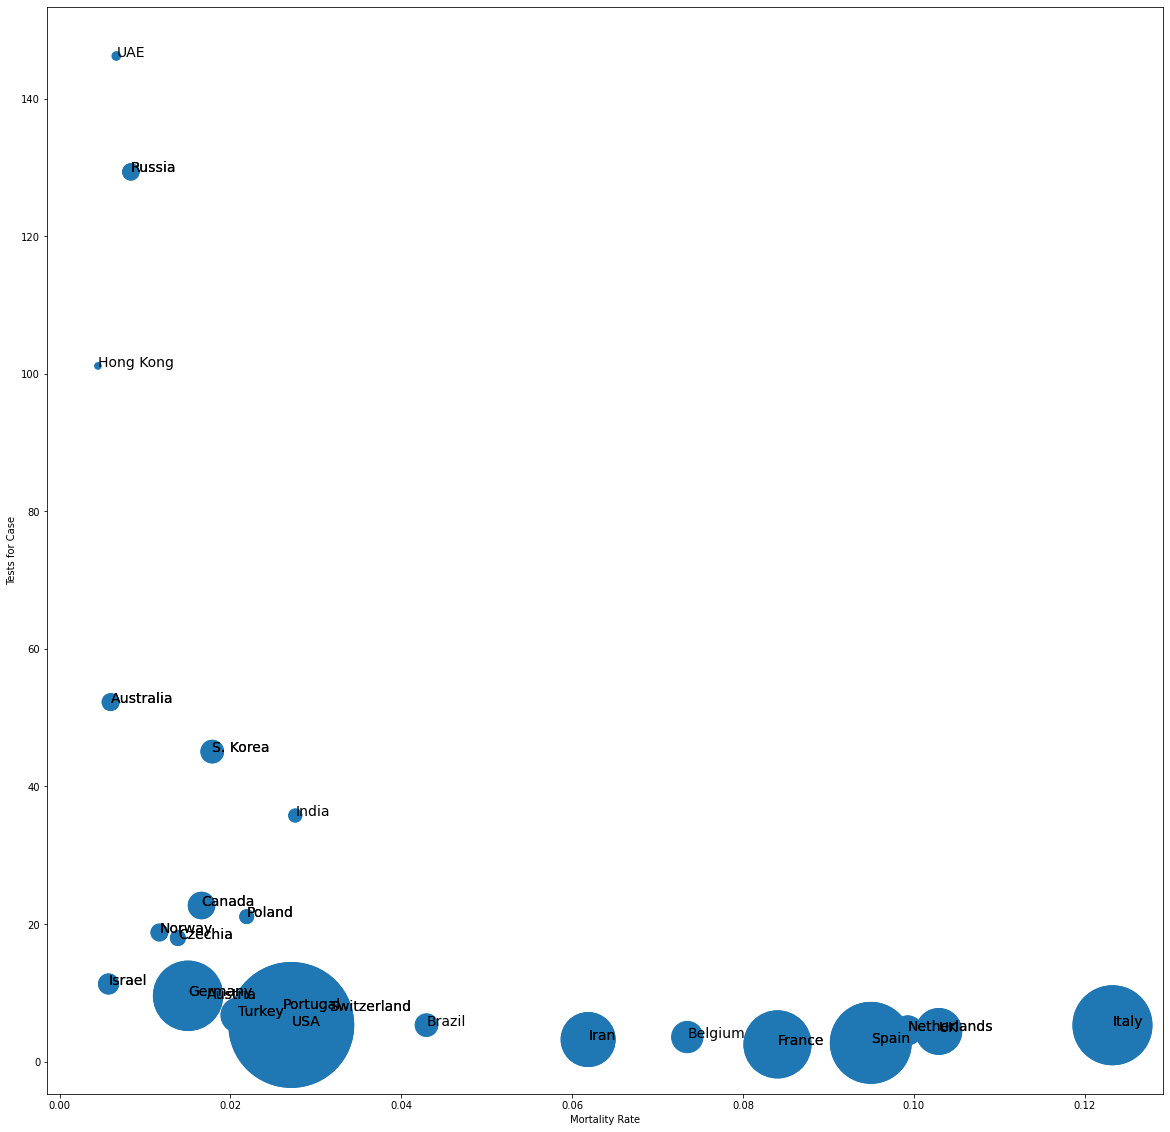

In [65]:
# Bubble size corresponds to cases.

plot = df.plot.scatter(x='Mortality Rate', y='Tests for Case',
                       s=df['Cases']*0.05, figsize=(20,20))
for i, txt in enumerate(df.Country):
    plot.annotate(txt, (df['Mortality Rate'].iat[i], df['Tests for Case'].iat[i]), size=14)

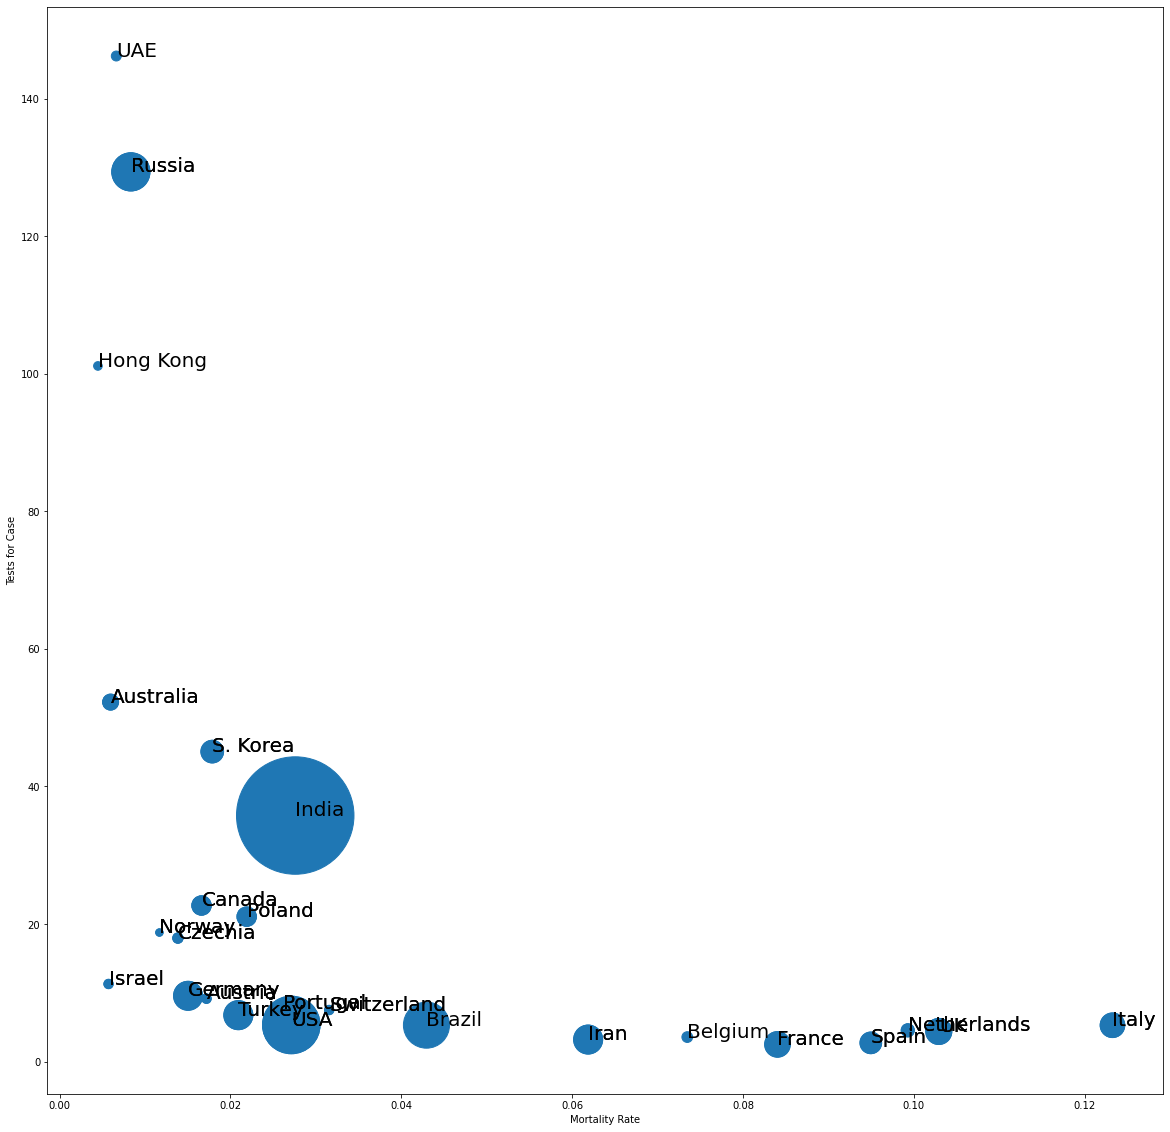

In [66]:
# Bubble size corresponds to population.

plot = df.plot.scatter(x='Mortality Rate', y='Tests for Case',
                       s=df['PopM']*10, figsize=(20,20))
for i, txt in enumerate(df.Country):
    plot.annotate(txt, (df['Mortality Rate'].iat[i], df['Tests for Case'].iat[i]), size=20)